In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)
library(plotly)


Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
file = "../../../../../../dataframes/envipe/TPer_Vic1/df_09_transform_cat_to_num.csv"


In [3]:
#cargar
df <- read.csv(file = file)
data <- df
head(data)

AP4_1,AP4_10_01,AP4_10_02,AP4_10_03,AP4_10_04,AP4_10_05,AP4_10_06,AP4_10_07,AP4_10_08,AP4_10_09,⋯,AP5_3_09,AP5_3_10,AP5_4_08,AP5_4_08_C,AP5_5_08,AP5_6_08,AP5_8,EDAD,ESTRATO,SEXO
0.9418024,0.5210382,0.5724649,0.7799452,0.5964856,0.7149766,0.9888764,0.8668386,0.6356602,0.6082541,⋯,0.7101403,0.9900048,0.9966145,0.9995164,0.9467999,0.9991939,0.6959536,0.5875,0.4533290,0.5336128
0.9418024,0.5210382,0.5724649,0.7799452,0.5964856,0.7149766,0.5595680,0.8668386,0.6356602,0.9553442,⋯,0.9919394,0.7585039,0.4394648,0.9995164,0.9467999,0.9289054,0.6959536,0.1125,0.4533290,0.5336128
0.9418024,0.5210382,0.5724649,0.9819442,0.9085926,0.7149766,0.9888764,0.8668386,0.9964533,0.9553442,⋯,0.9919394,0.7585039,0.4394648,0.3877156,0.5120103,0.5263582,0.6959536,0.4875,0.4533290,0.5336128
0.9418024,0.5210382,0.5724649,0.9819442,0.9085926,0.9214896,0.5595680,0.8668386,0.9964533,0.9553442,⋯,0.7101403,0.9900048,0.4394648,0.3877156,0.9467999,0.5263582,0.8918265,0.5625,0.4533290,1.0000000
0.9418024,0.9721103,0.5724649,0.7799452,0.9085926,0.9214896,0.9888764,0.8668386,0.6356602,0.9553442,⋯,0.7101403,0.9900048,0.9817830,0.3877156,0.5120103,0.7930034,0.6959536,0.5375,0.4533290,1.0000000
0.9418024,0.5210382,0.5724649,0.7799452,0.5964856,0.9214896,0.5595680,0.9887151,0.6356602,0.6082541,⋯,0.9919394,0.7585039,0.7913913,0.7539900,1.0000000,0.5263582,0.6959536,0.0625,0.8326616,0.5336128


In [4]:
ncol(data)

[1] 119

In [5]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data,iter.max = 50, 
                          centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 310150)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 310150)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 310150)”

In [6]:
max(dunn_kmeans)

[1] 0.3458179

Saving 7 x 7 in image


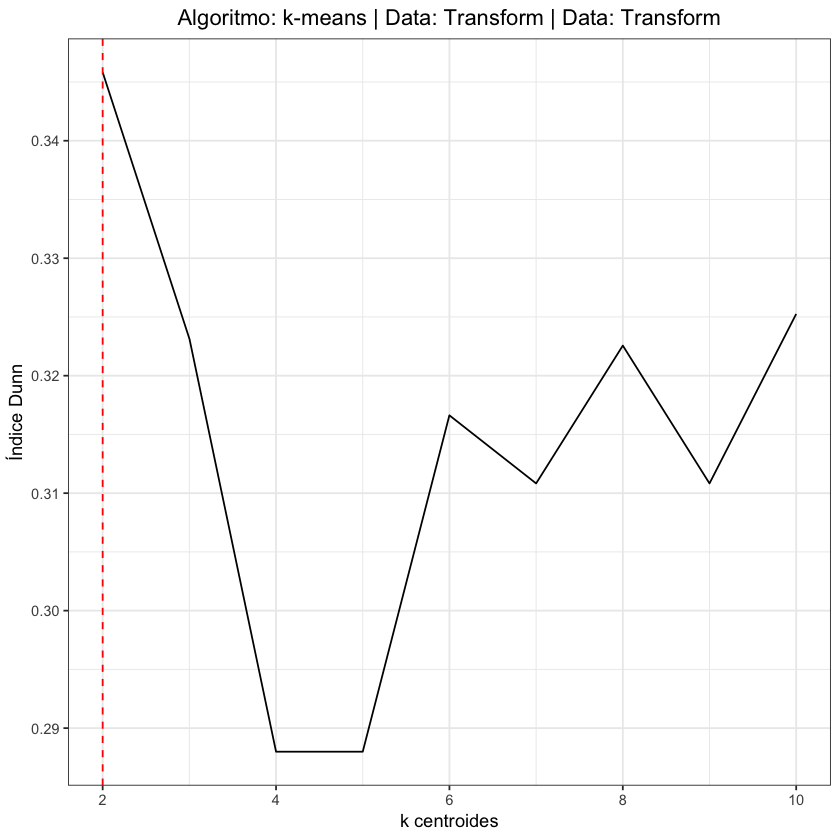

In [7]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'Algoritmo: k-means | Data: Transform | Data: Transform', 
                                   xlab = 'k centroides', 
                                   ylab = 'Índice Dunn')


plot_dunn_kmeans  + 
theme_bw() + #ylim(0,0.3) + 
geom_vline(xintercept = range_k[which.max(dunn_kmeans)], linetype = 2, color='red') +
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/envipe/TPER/dunn_euclidean_encoding.png", dpi = 300)
    

In [8]:
kmeans <- stats::kmeans(x = data, iter.max = 50,
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

Saving 7 x 7 in image


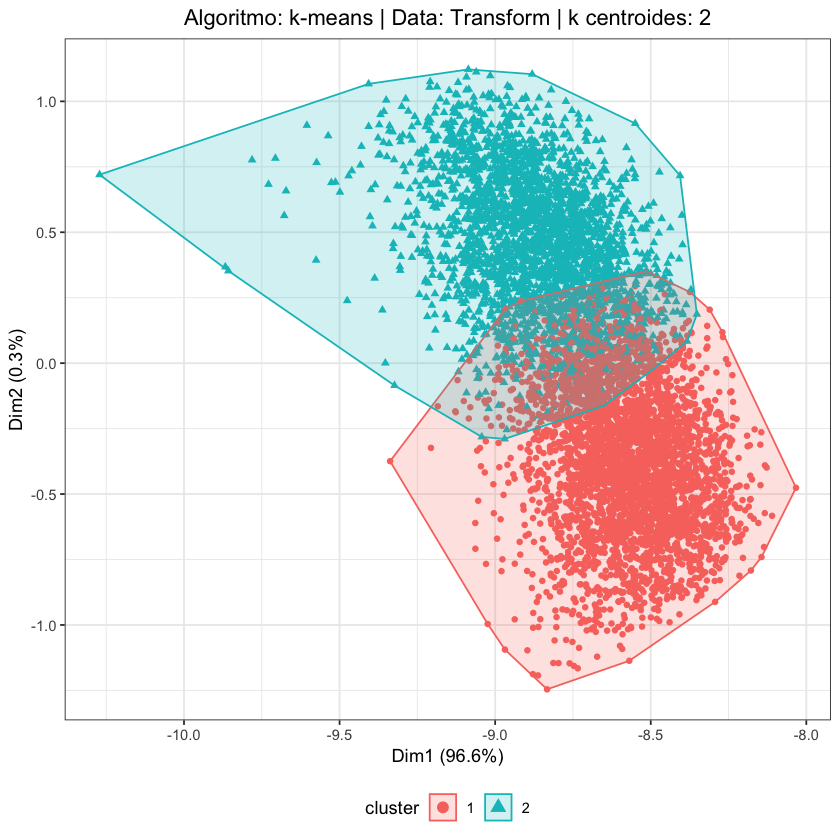

In [9]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Algoritmo: k-means | Data: Transform | k centroides:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans + 
theme_bw() +
theme(legend.position = 'bottom') + 
theme(plot.title = element_text(hjust = 0.5)) +
ggsave(filename = "../../../../../../images/envipe/TPER/kmeans_transform.png", 
       dpi = 300)

In [10]:
file = "../../../../../../dataframes/envipe/TPer_Vic1/df_transform_cluster.csv"


In [11]:
write.csv(kmeans$cluster, 
          file = file,
          row.names=F)
